In [1]:


import json
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("TRDataChallenge2023 Analysis")
print("=" * 50)

# 1. Read and parse the data
print("\n1. READING AND PARSING DATA")
print("-" * 30)

# Read the txt file
with open('TRDataChallenge2023.txt', 'r', encoding='utf-8') as file:
    content = file.read()

print(f"File size: {len(content)} characters")
print(f"First 500 characters:")
print(content[:500])

# Parse JSON dictionaries from the file
data = []
lines = content.strip().split('\n')

for i, line in enumerate(lines):
    if line.strip():
        try:
            json_obj = json.loads(line)
            data.append(json_obj)
        except json.JSONDecodeError as e:
            print(f"Error parsing line {i+1}: {e}")
            print(f"Line content: {line[:100]}...")

print(f"\nSuccessfully parsed {len(data)} JSON objects")


TRDataChallenge2023 Analysis

1. READING AND PARSING DATA
------------------------------
File size: 331936506 characters
First 500 characters:
{"documentId":"Ib4e590e0a55f11e8a5d58a2c8dcb28b5","postures":["On Appeal"],"sections":[{"headtext":"","paragraphs":["Plaintiff Dwight Watson (“Husband”) appeals from the trial court’s equitable distribution order entered 28 February 2017. On appeal, plaintiff contends that the trial court erred in its classification, valuation, and distribution of the parties’ property and in granting defendant Gertha  Watson (“Wife”) an unequal distribution of martial property. Because the trial court’s finding

Successfully parsed 18000 JSON objects


In [3]:
# 2. Structure analysis
print("\n2. DATA STRUCTURE ANALYSIS")
print("-" * 30)

if data:
    print("Sample JSON object:")
    print(json.dumps(data[0], indent=2))
    
    print("\nKeys in the JSON objects:")
    all_keys = set()
    for obj in data:
        if isinstance(obj, dict):
            all_keys.update(obj.keys())
    
    for key in sorted(all_keys):
        print(f"- {key}")



2. DATA STRUCTURE ANALYSIS
------------------------------
Sample JSON object:
{
  "documentId": "Ib4e590e0a55f11e8a5d58a2c8dcb28b5",
  "postures": [
    "On Appeal"
  ],
  "sections": [
    {
      "headtext": "",
      "paragraphs": [
        "Plaintiff Dwight Watson (\u201cHusband\u201d) appeals from the trial court\u2019s equitable distribution order entered 28 February 2017. On appeal, plaintiff contends that the trial court erred in its classification, valuation, and distribution of the parties\u2019 property and in granting defendant Gertha\u2009 Watson (\u201cWife\u201d) an unequal distribution of martial property. Because the trial court\u2019s findings of fact do not support its conclusions of law and because the distributional factors found by the trial court are based upon some of those erroneous findings and conclusions, we reverse the equitable distribution order and remand for entry of a new equitable distribution order."
      ]
    },
    {
      "headtext": "Backgroun

In [11]:
# 3. Convert to DataFrame for easier analysis
print("\n3. DATAFRAME CONVERSION")
print("-" * 30)

if data and isinstance(data[0], dict):
    df = pd.DataFrame(data)
    print(f"DataFrame shape: {df.shape}")
    print("\nDataFrame info:")
    df.info()
    print("\nFirst few rows:")
    print(df.head())
else:
    print("Data is not in expected dictionary format")



3. DATAFRAME CONVERSION
------------------------------
DataFrame shape: (18000, 3)

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   documentId  18000 non-null  object
 1   postures    18000 non-null  object
 2   sections    18000 non-null  object
dtypes: object(3)
memory usage: 422.0+ KB

First few rows:
                          documentId  \
0  Ib4e590e0a55f11e8a5d58a2c8dcb28b5   
1  Ib06ab4d056a011e98c7a8e995225dbf9   
2  Iaa3e3390b93111e9ba33b03ae9101fb2   
3  I0d4dffc381b711e280719c3f0e80bdd0   
4  I82c7ef10d6d111e8aec5b23c3317c9c0   

                                            postures  \
0                                        [On Appeal]   
1  [Appellate Review, Sentencing or Penalty Phase...   
2          [Motion to Compel Arbitration, On Appeal]   
3     [On Appeal, Review of Administrative Decision]   
4          

In [8]:
df

,documentId,postures,sections
0,Ib4e590e0a55f11e8a5d58a2c8dcb28b5,[On Appeal],"[{'headtext': '', 'paragraphs': ['Plaintiff Dw..."
1,Ib06ab4d056a011e98c7a8e995225dbf9,"[Appellate Review, Sentencing or Penalty Phase...","[{'headtext': '', 'paragraphs': ['After pleadi..."
2,Iaa3e3390b93111e9ba33b03ae9101fb2,"[Motion to Compel Arbitration, On Appeal]","[{'headtext': '', 'paragraphs': ['Frederick Gr..."
3,I0d4dffc381b711e280719c3f0e80bdd0,"[On Appeal, Review of Administrative Decision]","[{'headtext': '', 'paragraphs': ['Appeal from ..."
4,I82c7ef10d6d111e8aec5b23c3317c9c0,[On Appeal],"[{'headtext': '', 'paragraphs': ['Order, Supre..."
...,...,...,...
17995,Ia5743cf0e4b611e99e94fcbef715f24d,[Appellate Review],"[{'headtext': '', 'paragraphs': ['¶1 On Februa..."
17996,I974c18f08f1611e998e8870e22e55653,[Objection to Proof of Claim],[{'headtext': 'ORDER OVERRULING DEBTOR'S OBJEC...
17997,Idaaa92f0886f11e998e8870e22e55653,"[Appellate Review, Trial or Guilt Phase Motion...","[{'headtext': '', 'paragraphs': ['A jury convi..."
17998,I247a8420677e11e9a072efd81f5238d6,"[Appellate Review, Jury Selection Challenge or...","[{'headtext': '', 'paragraphs': ['Defendant Ch..."


In [12]:
# 4. Descriptive statistics and data exploration
print("\n4. DESCRIPTIVE STATISTICS")
print("-" * 30)

if not df.empty:
    print("Missing values:")
    print(df.isnull().sum())
    
    print("\nData types:")
    print(df.dtypes)
    
    print(f"\nDataset Overview:")
    print(f"- Total documents: {len(df)}")
    print(f"- Unique document IDs: {df['documentId'].nunique()}")
    
    # Analyze postures column
    print(f"\nPostures Analysis:")
    all_postures = []
    for posture_list in df['postures']:
        if isinstance(posture_list, list):
            all_postures.extend(posture_list)
    
    posture_counts = Counter(all_postures)
    print(f"Total unique postures: {len(posture_counts)}")
    print("Most common postures:")
    for posture, count in posture_counts.most_common(10):
        print(f"  {posture}: {count}")
    
    # Analyze sections structure
    print(f"\nSections Analysis:")
    section_counts = []
    for sections in df['sections']:
        if isinstance(sections, list):
            section_counts.append(len(sections))
    
    if section_counts:
        print(f"Average sections per document: {np.mean(section_counts):.2f}")
        print(f"Min sections: {min(section_counts)}")
        print(f"Max sections: {max(section_counts)}")
        
    # Sample section analysis
    print(f"\nSample Section Structure:")
    if df['sections'].iloc[0] and isinstance(df['sections'].iloc[0], list):
        sample_section = df['sections'].iloc[0][0]
        if isinstance(sample_section, dict):
            print(f"Section keys: {list(sample_section.keys())}")
            if 'paragraphs' in sample_section and isinstance(sample_section['paragraphs'], list):
                print(f"Paragraphs in first section: {len(sample_section['paragraphs'])}")
else:
    print("DataFrame is not available or empty")



4. DESCRIPTIVE STATISTICS
------------------------------
Missing values:
documentId    0
postures      0
sections      0
dtype: int64

Data types:
documentId    object
postures      object
sections      object
dtype: object

Dataset Overview:
- Total documents: 18000
- Unique document IDs: 18000

Postures Analysis:
Total unique postures: 224
Most common postures:
  On Appeal: 9197
  Appellate Review: 4652
  Review of Administrative Decision: 2773
  Motion to Dismiss: 1679
  Sentencing or Penalty Phase Motion or Objection: 1342
  Trial or Guilt Phase Motion or Objection: 1097
  Motion for Attorney's Fees: 612
  Post-Trial Hearing Motion: 512
  Motion for Preliminary Injunction: 364
  Motion to Dismiss for Lack of Subject Matter Jurisdiction: 343

Sections Analysis:
Average sections per document: 5.09
Min sections: 1
Max sections: 91

Sample Section Structure:
Section keys: ['headtext', 'paragraphs']
Paragraphs in first section: 1


In [13]:
    # 5. Comprehensive counts
    print("\n5. DATASET COMPREHENSIVE COUNTS")
    print("-" * 30)

    # Count total documents
    total_documents = len(df)
    print(f"📄 Total Documents: {total_documents:,}")

    # Count unique postures across all documents
    all_postures = []
    for posture_list in df['postures']:
        if isinstance(posture_list, list):
            all_postures.extend(posture_list)

    unique_postures = set(all_postures)
    total_posture_instances = len(all_postures)
    print(f"⚖️  Total Posture Instances: {total_posture_instances:,}")
    print(f"⚖️  Unique Postures: {len(unique_postures):,}")

    # Count total paragraphs across all documents
    total_paragraphs = 0
    for sections_list in df['sections']:
        if isinstance(sections_list, list):
            for section in sections_list:
                if isinstance(section, dict) and 'paragraphs' in section:
                    if isinstance(section['paragraphs'], list):
                        total_paragraphs += len(section['paragraphs'])

    print(f"📝 Total Paragraphs: {total_paragraphs:,}")

    # Additional insights
    print(f"\nADDITIONAL INSIGHTS:")
    avg_postures_per_doc = total_posture_instances / total_documents
    avg_paragraphs_per_doc = total_paragraphs / total_documents

    print(f"📊 Average Postures per Document: {avg_postures_per_doc:.2f}")
    print(f"📊 Average Paragraphs per Document: {avg_paragraphs_per_doc:.2f}")

    # Documents with multiple postures
    multi_posture_docs_count = sum(1 for postures in df['postures'] if isinstance(postures, list) and len(postures) > 1)
    print(f"📊 Documents with Multiple Postures: {multi_posture_docs_count:,} ({(multi_posture_docs_count/total_documents)*100:.1f}%)")

    # Most common postures (top 10)
    posture_counts = Counter(all_postures)
    print(f"\n🏆 TOP 10 MOST COMMON POSTURES:")
    for i, (posture, count) in enumerate(posture_counts.most_common(10), 1):
        percentage = (count / total_posture_instances) * 100
        print(f"{i:2d}. {posture}: {count:,} ({percentage:.1f}%)")



5. DATASET COMPREHENSIVE COUNTS
------------------------------
📄 Total Documents: 18,000
⚖️  Total Posture Instances: 27,659
⚖️  Unique Postures: 224
📝 Total Paragraphs: 542,169

ADDITIONAL INSIGHTS:
📊 Average Postures per Document: 1.54
📊 Average Paragraphs per Document: 30.12
📊 Documents with Multiple Postures: 8,959 (49.8%)

🏆 TOP 10 MOST COMMON POSTURES:
 1. On Appeal: 9,197 (33.3%)
 2. Appellate Review: 4,652 (16.8%)
 3. Review of Administrative Decision: 2,773 (10.0%)
 4. Motion to Dismiss: 1,679 (6.1%)
 5. Sentencing or Penalty Phase Motion or Objection: 1,342 (4.9%)
 6. Trial or Guilt Phase Motion or Objection: 1,097 (4.0%)
 7. Motion for Attorney's Fees: 612 (2.2%)
 8. Post-Trial Hearing Motion: 512 (1.9%)
 9. Motion for Preliminary Injunction: 364 (1.3%)
10. Motion to Dismiss for Lack of Subject Matter Jurisdiction: 343 (1.2%)



6. MULTI-POSTURE DOCUMENTS ANALYSIS
------------------------------
📊 Multi-posture documents: 8,959
📊 Single-posture documents: 8,118

🔍 EXAMPLES OF MULTI-POSTURE DOCUMENTS:
 1. Document ID: Ib06ab4d056a011e98c7a8e995225dbf9
    Postures (2): Appellate Review, Sentencing or Penalty Phase Motion or Objection

 2. Document ID: Iaa3e3390b93111e9ba33b03ae9101fb2
    Postures (2): Motion to Compel Arbitration, On Appeal

 3. Document ID: I0d4dffc381b711e280719c3f0e80bdd0
    Postures (2): On Appeal, Review of Administrative Decision

 4. Document ID: Icfcdb0e00bed11ea83e6f815c7cdf150
    Postures (2): Appellate Review, Sentencing or Penalty Phase Motion or Objection

 5. Document ID: I09917ab0969611e89fc9c0a8a8f09d21
    Postures (2): Appellate Review, Trial or Guilt Phase Motion or Objection

 6. Document ID: Icf6ceaa03f2d11e8a70fc9d8a0b2aef5
    Postures (2): On Appeal, Review of Administrative Decision

 7. Document ID: I56c92ff0384311e884b4b523d54ea998
    Postures (2): Motion for Prel

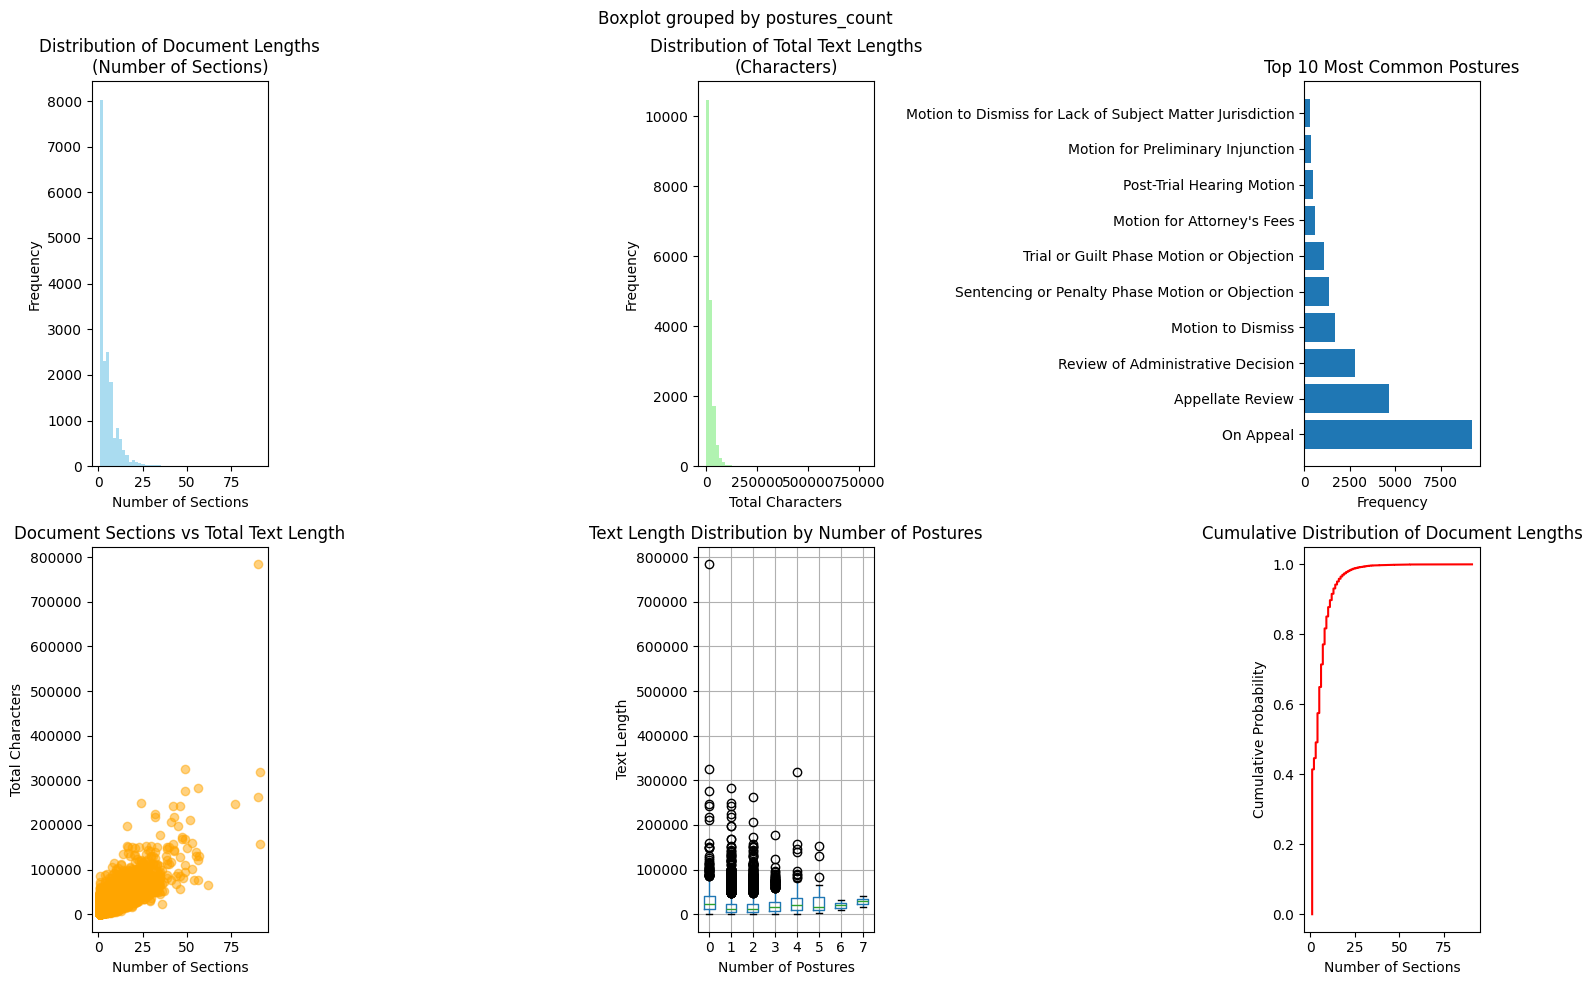


SUMMARY STATISTICS:
Document Lengths (sections):
  Mean: 5.09
  Median: 4.00
  Std: 5.73

Text Lengths (characters):
  Mean: 17,957
  Median: 12,786
  Std: 19,460

Postures per Document:
  Mean: 1.54
  Median: 1.00
  Most common count: (1, 8118)

8. ANALYSIS SUMMARY
------------------------------
📋 FINAL SUMMARY:
Total unique postures: 224
Postures appearing in multi-posture docs: 204
Postures only in single-posture docs: 20
Most multi-posture prone: Motion to Amend Findings (100.0%)
Least multi-posture prone: Motion to Vacate or Set Aside Discharge (0.0%)


In [17]:
# 6. Multi-posture documents analysis
print("\n6. MULTI-POSTURE DOCUMENTS ANALYSIS")
print("-" * 30)

# Find documents with multiple postures
multi_posture_docs = []
single_posture_docs = []

for idx, postures in enumerate(df['postures']):
    if isinstance(postures, list):
        if len(postures) > 1:
            multi_posture_docs.append({
                'index': idx,
                'documentId': df.iloc[idx]['documentId'],
                'postures': postures,
                'num_postures': len(postures)
            })
        elif len(postures) == 1:
            single_posture_docs.append({
                'index': idx,
                'postures': postures
            })

print(f"📊 Multi-posture documents: {len(multi_posture_docs):,}")
print(f"📊 Single-posture documents: {len(single_posture_docs):,}")

# Show examples of multi-posture documents
print(f"\n🔍 EXAMPLES OF MULTI-POSTURE DOCUMENTS:")
for i, doc in enumerate(multi_posture_docs[:10]):  # Show first 10 examples
    print(f"{i+1:2d}. Document ID: {doc['documentId']}")
    print(f"    Postures ({doc['num_postures']}): {', '.join(doc['postures'])}")
    print()

# Distribution of number of postures per document
posture_count_distribution = Counter([doc['num_postures'] for doc in multi_posture_docs])
print(f"📈 DISTRIBUTION OF POSTURES IN MULTI-POSTURE DOCUMENTS:")
for num_postures in sorted(posture_count_distribution.keys()):
    count = posture_count_distribution[num_postures]
    percentage = (count / len(multi_posture_docs)) * 100
    print(f"  {num_postures} postures: {count:,} documents ({percentage:.1f}%)")

# Analyze which postures appear in multi-posture vs single-posture documents
postures_in_multi = []
postures_in_single = []

for doc in multi_posture_docs:
    postures_in_multi.extend(doc['postures'])

for doc in single_posture_docs:
    postures_in_single.extend(doc['postures'])

# Count frequencies
multi_posture_counts = Counter(postures_in_multi)
single_posture_counts = Counter(postures_in_single)

# All unique postures
all_unique_postures = set(postures_in_multi + postures_in_single)

# Calculate statistics for each posture
posture_stats = {}
for posture in all_unique_postures:
    multi_freq = multi_posture_counts.get(posture, 0)
    single_freq = single_posture_counts.get(posture, 0)
    total_freq = multi_freq + single_freq
    
    multi_percentage = (multi_freq / total_freq) * 100 if total_freq > 0 else 0
    
    posture_stats[posture] = {
        'multi_freq': multi_freq,
        'single_freq': single_freq,
        'total_freq': total_freq,
        'multi_percentage': multi_percentage
    }

# Sort by multi-posture percentage (descending)
sorted_by_multi = sorted(posture_stats.items(), key=lambda x: x[1]['multi_percentage'], reverse=True)

print(f"\n🏆 TOP 15 POSTURES MOST INVOLVED IN MULTI-POSTURE DOCUMENTS:")
print(f"{'Rank':<4} {'Posture':<40} {'Multi':<6} {'Single':<7} {'Total':<7} {'Multi%':<8}")
print("-" * 80)

for i, (posture, stats) in enumerate(sorted_by_multi[:15], 1):
    posture_short = posture[:38]
    multi_pct = f"{stats['multi_percentage']:.1f}%"
    print(f"{i:<4} {posture_short:<40} {stats['multi_freq']:<6} {stats['single_freq']:<7} {stats['total_freq']:<7} {multi_pct:<8}")

# Sort by multi-posture percentage (ascending) - least involved
sorted_by_single = sorted(posture_stats.items(), key=lambda x: x[1]['multi_percentage'])

print(f"\n🏆 TOP 15 POSTURES LEAST INVOLVED IN MULTI-POSTURE DOCUMENTS:")
print(f"{'Rank':<4} {'Posture':<40} {'Multi':<6} {'Single':<7} {'Total':<7} {'Multi%':<8}")
print("-" * 80)

for i, (posture, stats) in enumerate(sorted_by_single[:15], 1):
    posture_short = posture[:38]
    multi_pct = f"{stats['multi_percentage']:.1f}%"
    print(f"{i:<4} {posture_short:<40} {stats['multi_freq']:<6} {stats['single_freq']:<7} {stats['total_freq']:<7} {multi_pct:<8}")

# Most common posture combinations in multi-posture documents
print(f"\n🔗 MOST COMMON POSTURE COMBINATIONS:")
combinations = [tuple(sorted(doc['postures'])) for doc in multi_posture_docs]
combination_counts = Counter(combinations)

for i, (combo, count) in enumerate(combination_counts.most_common(10), 1):
    percentage = (count / len(multi_posture_docs)) * 100
    print(f"{i:2d}. {' + '.join(combo)}")
    print(f"    Count: {count:,} ({percentage:.1f}% of multi-posture docs)")
    print()

# 7. Visualizations
print("\n7. GENERATING VISUALIZATIONS")
print("-" * 30)

# Create visualizations
plt.figure(figsize=(15, 10))

# Document length analysis
document_lengths = []
total_text_lengths = []

for sections in df['sections']:
    if isinstance(sections, list):
        doc_length = len(sections)
        document_lengths.append(doc_length)
        
        # Calculate total text length
        total_text = 0
        for section in sections:
            if isinstance(section, dict) and 'paragraphs' in section:
                for paragraph in section['paragraphs']:
                    if isinstance(paragraph, str):
                        total_text += len(paragraph)
        total_text_lengths.append(total_text)

# Plot 1: Distribution of document lengths (number of sections)
plt.subplot(2, 3, 1)
plt.hist(document_lengths, bins=50, alpha=0.7, color='skyblue')
plt.title('Distribution of Document Lengths\n(Number of Sections)')
plt.xlabel('Number of Sections')
plt.ylabel('Frequency')

# Plot 2: Distribution of total text lengths
plt.subplot(2, 3, 2)
plt.hist(total_text_lengths, bins=50, alpha=0.7, color='lightgreen')
plt.title('Distribution of Total Text Lengths\n(Characters)')
plt.xlabel('Total Characters')
plt.ylabel('Frequency')

# Plot 3: Postures frequency
plt.subplot(2, 3, 3)
top_postures = dict(posture_counts.most_common(10))
plt.barh(list(top_postures.keys()), list(top_postures.values()))
plt.title('Top 10 Most Common Postures')
plt.xlabel('Frequency')

# Plot 4: Document length vs text length scatter
plt.subplot(2, 3, 4)
plt.scatter(document_lengths, total_text_lengths, alpha=0.5, color='orange')
plt.title('Document Sections vs Total Text Length')
plt.xlabel('Number of Sections')
plt.ylabel('Total Characters')

# Plot 5: Boxplot of text lengths by number of postures
plt.subplot(2, 3, 5)
postures_per_doc = [len(postures) if isinstance(postures, list) else 0 for postures in df['postures']]
df_temp = pd.DataFrame({'postures_count': postures_per_doc, 'text_length': total_text_lengths})
df_temp.boxplot(column='text_length', by='postures_count', ax=plt.gca())
plt.title('Text Length Distribution by Number of Postures')
plt.xlabel('Number of Postures')
plt.ylabel('Text Length')

# Plot 6: Cumulative distribution of document lengths
plt.subplot(2, 3, 6)
sorted_lengths = np.sort(document_lengths)
cumulative_prob = np.arange(1, len(sorted_lengths) + 1) / len(sorted_lengths)
plt.plot(sorted_lengths, cumulative_prob, color='red')
plt.title('Cumulative Distribution of Document Lengths')
plt.xlabel('Number of Sections')
plt.ylabel('Cumulative Probability')

plt.tight_layout()
plt.savefig('legal_documents_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary statistics
print("\nSUMMARY STATISTICS:")
print(f"Document Lengths (sections):")
print(f"  Mean: {np.mean(document_lengths):.2f}")
print(f"  Median: {np.median(document_lengths):.2f}")
print(f"  Std: {np.std(document_lengths):.2f}")

print(f"\nText Lengths (characters):")
print(f"  Mean: {np.mean(total_text_lengths):,.0f}")
print(f"  Median: {np.median(total_text_lengths):,.0f}")
print(f"  Std: {np.std(total_text_lengths):,.0f}")

print(f"\nPostures per Document:")
print(f"  Mean: {np.mean(postures_per_doc):.2f}")
print(f"  Median: {np.median(postures_per_doc):.2f}")
print(f"  Most common count: {Counter(postures_per_doc).most_common(1)[0]}")

# 8. Final analysis summary
print("\n8. ANALYSIS SUMMARY")
print("-" * 30)

print(f"📋 FINAL SUMMARY:")
print(f"Total unique postures: {len(all_unique_postures):,}")
print(f"Postures appearing in multi-posture docs: {len([p for p in posture_stats if posture_stats[p]['multi_freq'] > 0]):,}")
print(f"Postures only in single-posture docs: {len([p for p in posture_stats if posture_stats[p]['multi_freq'] == 0]):,}")
if sorted_by_multi:
    print(f"Most multi-posture prone: {sorted_by_multi[0][0]} ({sorted_by_multi[0][1]['multi_percentage']:.1f}%)")
if sorted_by_single:
    print(f"Least multi-posture prone: {sorted_by_single[0][0]} ({sorted_by_single[0][1]['multi_percentage']:.1f}%)")

# Generate comprehensive analysis request
